## **Abstract**

El proyecto es un análisis exploratorio del conjunto de datos "House Prices - Advanced Regression Techniques", disponible en Kaggle. El objetivo principal es comprender los factores que influyen en los precios de venta de propiedades residenciales en Ames, Iowa.

La base de datos comprende 79 variables que describen casi todos los aspectos de las casas residenciales individuales, cubriendo una amplia gama de atributos arquitectónicos, de ubicación y de calidad de construcción. Se utilizarán técnicas de visualización univariadas, bivariadas y multivariadas, junto con resúmenes numéricos, para explorar las distribuciones de las variables, las relaciones entre ellas y detectar patrones o anomalías.

Inicialmente, se abordará la identificación y el manejo de valores perdidos, lo cual es crucial para la integridad del análisis. Posteriormente, se formularán preguntas e hipótesis específicas que guiarán la exploración de los datos, como la relación entre la superficie habitable, el número de baños, import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsla antigüedad de la propiedad y el precio de venta. Se espera que este análisis proporcione una comprensión profunda de los impulsores de los precios de las viviendas, sentando las bases para futuros modelos predictivos y ofreciendo insights valiosos tanto para compradores como para vendedores en el mercado inmobiliario.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('train.csv')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("Error: 'train.csv' no encontrado. Asegúrate de que el archivo esté en la ruta correcta.")

Dataset cargado exitosamente.


In [3]:
print("\nPrimeras 5 filas del dataset:")
df.head()


Primeras 5 filas del dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Valores perdidos**

In [9]:
missing_values = df.isnull().sum()
# Columnas con valores perdidos
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [10]:
print("\nPorcentaje de valores perdidos por columna (solo las que tienen):")
print((missing_values / len(df)) * 100)


Porcentaje de valores perdidos por columna (solo las que tienen):
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


## **Consigna 1:** Hipótesis de Interés

*Pregunta 1: ¿Cómo se relaciona el área habitable total (GrLivArea) con el precio de venta (SalePrice)? ¿Es una relación lineal?*
- **Hipótesis 1:** Las casas con mayor área habitable (GrLivArea) tienden a tener precios de venta significativamente más altos.

*Pregunta 2: ¿La antigüedad de una casa (YearBuilt, YrSold) afecta su precio de venta? ¿Las casas más nuevas son siempre más caras?*
- **Hipótesis 2:** Existe una correlación negativa entre la antigüedad de la casa (cuanto más antigua, menor valor) y su precio de venta, aunque las casas históricas bien conservadas podrían ser una excepción.

*Pregunta 3:* ¿Existen diferencias significativas en el SalePrice según la ubicación (Neighborhood)?
- **Hipótesis 3:** El barrio (Neighborhood) es un factor crucial que genera diferencias notables en el precio promedio de las viviendas.

## **Consigna 2+3:** Gráficos y análisis numérico

### **Hipotesis 1:** Las casas con mayor área habitable tienen  precios significativamente más elevados


In [34]:
print("\nEstadísticas descriptivas de SalePrice:")
df['SalePrice'].describe()


Estadísticas descriptivas de SalePrice:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
print("\nEstadísticas descriptivas de GrLivArea:")
df['GrLivArea'].describe()


Estadísticas descriptivas de GrLivArea:


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [14]:
# Calcular la correlación entre GrLivArea y SalePrice
correlation_grlivarea_saleprice = df['GrLivArea'].corr(df['SalePrice'])
print(f"\nCorrelación entre GrLivArea y SalePrice: {correlation_grlivarea_saleprice:.2f}")


Correlación entre GrLivArea y SalePrice: 0.71


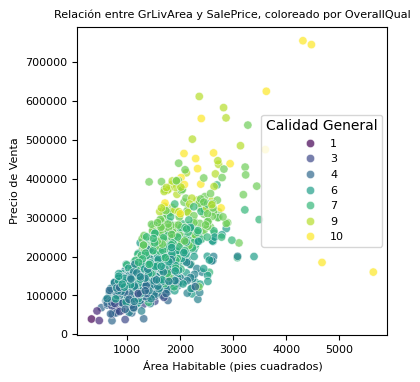

In [39]:
# Gráfico de dispersión de GrLivArea vs SalePrice, coloreado por OverallQual
plt.figure(figsize=(4, 4))

sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', hue = 'OverallQual', data=df, palette='viridis', alpha=0.7)
plt.title('Relación entre GrLivArea y SalePrice, coloreado por OverallQual',fontsize = 8)
plt.xlabel('Área Habitable (pies cuadrados)',fontsize = 8)
plt.ylabel('Precio de Venta',fontsize = 8)
plt.legend(title='Calidad General',fontsize = 8)
plt.tick_params(axis = 'both',which = 'major',labelsize = 8)
plt.grid(False)

1. El gráfico de dispersión muestra una clara relación positiva entre `GrLivArea` y `SalePrice`, lo que confirma nuestra hipótesis quea mayor área habitable, mayor precio de venta.
2. La correlación 0,71 es lo suficientemente alta (y postiva) para sugerir una relación casi lineal.
3. Los casos donde `OverallQual` es elevado, parecieran tener una relación positiva con ambas variables (más alto es el índice de calidad, mayor es el precio, pero las casas tienden a ser más grandes)
4. Se pueden observar algunos outliers.

### **Hipótesis 2:** ¿La antigüedad de una casa (`YearBuilt`, `YrSold`) afecta su precio de venta? ¿Las casas más nuevas son siempre más caras?

In [36]:
# Agrupar por década de construcción y calcular el precio medio
df['Age'] = df['YrSold'] - df['YearBuilt']
print("\nEstadísticas descriptivas de Age:")
df['Age'].describe()


Estadísticas descriptivas de Age:


count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64

In [37]:
# Precio promedio por rango de antigüedad (ej. cuartiles)
df['Age_Group'] = pd.qcut(df['Age'], q = 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print("\nPrecio promedio por grupo de edad:")
df.groupby('Age_Group')['SalePrice'].mean()


Precio promedio por grupo de edad:


C:\Users\grego\AppData\Local\Temp\ipykernel_15496\1291241344.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['SalePrice'].mean()


Age_Group
Q1    241596.388175
Q2    198433.232759
Q3    148069.169444
Q4    131692.245179
Name: SalePrice, dtype: float64

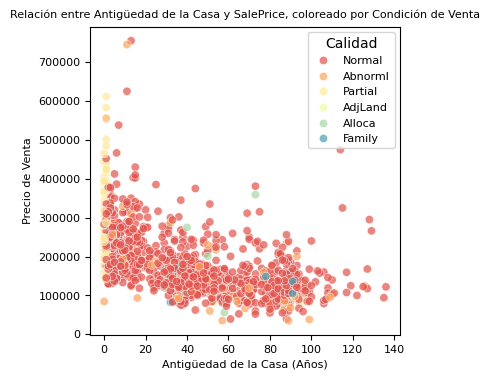

In [51]:
# Gráfico de dispersión de Age vs SalePrice, con hue por SaleCondition
plt.figure(figsize=(4, 4))
sns.scatterplot(x = 'Age', y = 'SalePrice', hue = 'SaleCondition', data=df, palette = 'Spectral', alpha=0.7)
plt.title('Relación entre Antigüedad de la Casa y SalePrice, coloreado por Condición de Venta',fontsize = 8)
plt.xlabel('Antigüedad de la Casa (Años)',fontsize = 8)
plt.ylabel('Precio de Venta',fontsize = 8)
plt.legend(title='Calidad',fontsize = 8)
plt.tick_params(axis = 'both',which = 'major',labelsize = 8)
plt.grid(False)

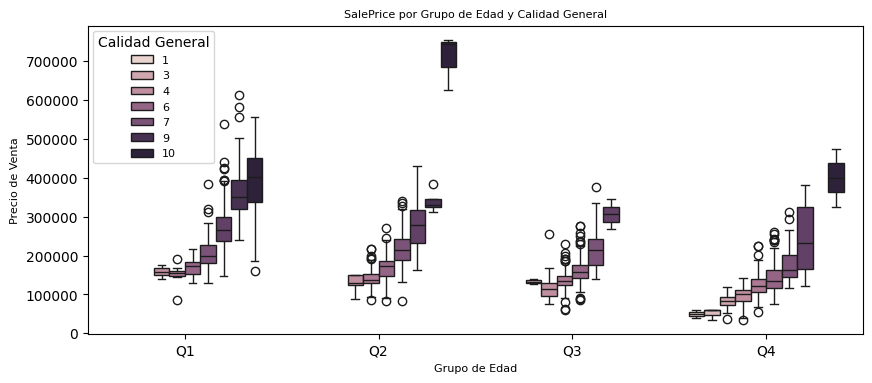

In [47]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = 'Age_Group', y = 'SalePrice', hue = 'OverallQual', data=df)
plt.title('SalePrice por Grupo de Edad y Calidad General',fontsize = 8)
plt.xlabel('Grupo de Edad',fontsize = 8)
plt.ylabel('Precio de Venta',fontsize = 8)
plt.legend(title='Calidad General',fontsize = 8)
plt.grid(False)

1. Se observa una tendencia general donde las casas más nuevas (Age baja) tienden a tener precios más altos, lo que respalda parcialmente la hipótesis.
2. El gráfico de boxes muestra que, aunque son poco, las casas viejas con alto índice `OverallQual` tienen un valor competitivo en el mercado.
3. La `SaleCondition` también introduce variabilidad, sugiriendo que las condiciones de venta específicas pueden influir en el precio final, independientemente de la antigüedad, aunque parece que el mercado está inundado de casas normales sin ninguna particularidad
4. Las ventas "Adjland" (ventas parciales con terrenos adjecentes disponibles a la venta) pueden tener precios más altos

### **Hipotesis 3:** ¿Existen diferencias significativas en el SalePrice según la ubicación (Neighborhood)?

In [52]:
# Precio promedio por barrio
print("\nPrecio promedio de venta por barrio:")
print(df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False))


Precio promedio de venta por barrio:
Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64


In [54]:
# Contar la cantidad de casas por barrio (para ver la representatividad)
print("\nConteo de casas por barrio:")
df['Neighborhood'].value_counts()


Conteo de casas por barrio:


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

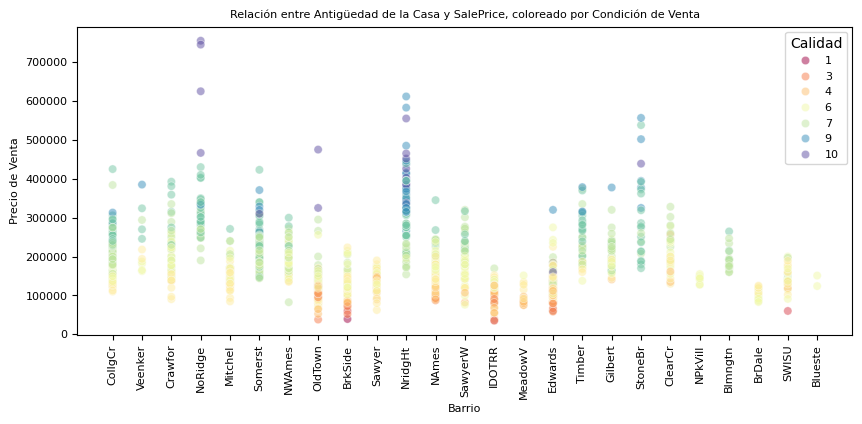

In [70]:
# Gráfico de dispersión de Age vs SalePrice, con hue por SaleCondition
plt.figure(figsize=(10, 4))
sns.scatterplot(x = 'Neighborhood', y = 'SalePrice', hue = 'OverallQual', data=df, palette = 'Spectral', alpha=0.5)
plt.title('Relación entre Antigüedad de la Casa y SalePrice, coloreado por Condición de Venta',fontsize = 8)
plt.xticks(rotation = 90)
plt.xlabel('Barrio',fontsize = 8)
plt.ylabel('Precio de Venta',fontsize = 8)
plt.legend(title='Calidad',fontsize = 8)
plt.tick_params(axis = 'both',which = 'major',labelsize = 8)
plt.grid(False)

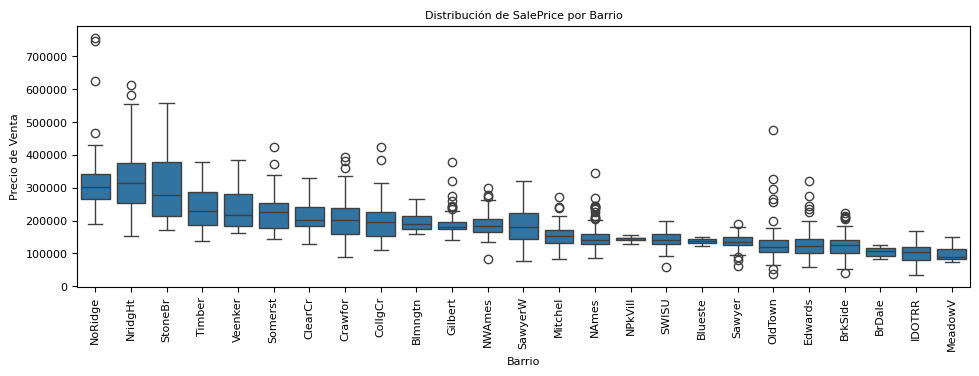

In [58]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df, order = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.title('Distribución de SalePrice por Barrio',fontsize = 8)
plt.xlabel('Barrio',fontsize = 8)
plt.ylabel('Precio de Venta',fontsize = 8)
plt.grid(False)
plt.tight_layout()
plt.tick_params(axis = 'both',which = 'major',labelsize = 8)

1. Hay barrios que concentran las casas de precios más elevados, con los valores de calidad más elevados.
2. Barrios como NoRidge, NridgHt y StoneBr muestran medianas de precios considerablemente más altas, lo que sugiere que la ubicación es un factor determinante del valor.
3. Esto valida de cierta manera, que el barrio condiciona al precio de venta.